# Proyek Analisis Data: Bike Sharing Dataset
- Nama : Ahmad Fanani
- Email : afanfanani03@gmail.com
- Id Dicoding : afanfanani03

## Menentukan Pertanyaan Bisnis



1. Bagaimana penggunaan sepeda berbeda antara musim (spring, summer, fall, winter)? Apakah ada musim tertentu yang menjadi favorit penggunaan sepeda?
2. Bagaimana tren peminjaman sepeda berubah seiring berjalannya waktu? Apakah ada peningkatan atau penurunan dari tahun ke tahun, bulan ke bulan, atau musim ke musim?
3. Bagaimana penggunaan antara user terdaftar dengan user biasa?

# Data Wrangling

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Tahap Gathering Data

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/KULIAH/Pribadi/Dicoding/Belajar Analisis Data dengan Python/Project Akhir/Bike-sharing-dataset/day.csv")

In [ ]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


## Tahap Assessing Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
df.shape

(731, 16)

In [ ]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


## Tahap Cleaning

# EDA

## Season Favorit

In [ ]:
season_count = df.groupby(by="season").cnt.sum().sort_values(ascending=False).reset_index()
season_count

,season,cnt
0,3,1061129
1,2,918589
2,4,841613
3,1,471348


In [ ]:
# Membuat dictionary untuk pemetaan nama musim
mapping_season = {1: 'springer', 2: 'summer', 3: 'fall', 4: 'winter'}

# Menggunakan metode map untuk merename nilai dalam kolom 'season'
season_count['season'] = season_count['season'].map(mapping_season)

In [ ]:
season_count

,season,cnt
0,fall,1061129
1,summer,918589
2,winter,841613
3,springer,471348


Dari data diatas bisa terlihat bahwa musim fall merupakan musim paling banyak penggunaan sepeda

## Cuaca Favorit

In [ ]:
weather_count = df.groupby(by="weathersit").cnt.sum().sort_values(ascending=False).reset_index()
weather_count

,weathersit,cnt
0,1,2257952
1,2,996858
2,3,37869


In [ ]:
mapping_weather = {1: 'Clear', 2: 'Mist', 3: 'Light Snow'}
weather_count['weathersit'] = weather_count['weathersit'].map(mapping_weather)

In [ ]:
weather_count

,weathersit,cnt
0,Clear,2257952
1,Mist,996858
2,Light Snow,37869


Dari data diatas bisa disimpulkan bahwa cuaca yang paling jadi favorit pengguna sepeda adalah "Clear"

In [ ]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


# Visualisasi

## Pertanyaan 1

Bagaimana penggunaan sepeda berbeda antara musim (spring, summer, fall, winter)? Apakah ada musim tertentu yang menjadi favorit penggunaan sepeda?

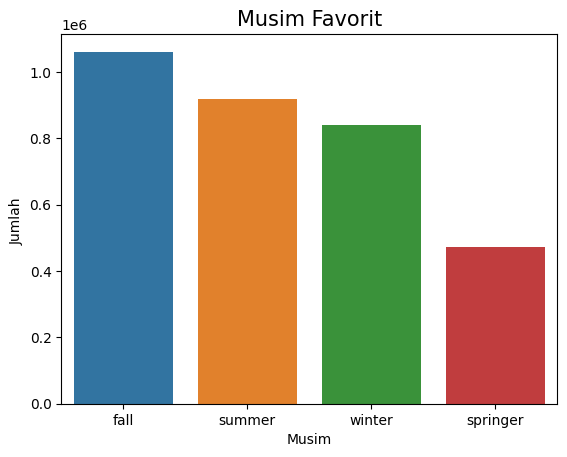

In [ ]:
sns.barplot(x="season", y="cnt", data=season_count)

plt.title("Musim Favorit", loc="center", fontsize=15)
plt.ylabel('Jumlah ')
plt.xlabel('Musim')
plt.show()

Dari visualisasi diatas musim favorit dengan jumlah penggunaan terbanyak yaitu musim "Fall"

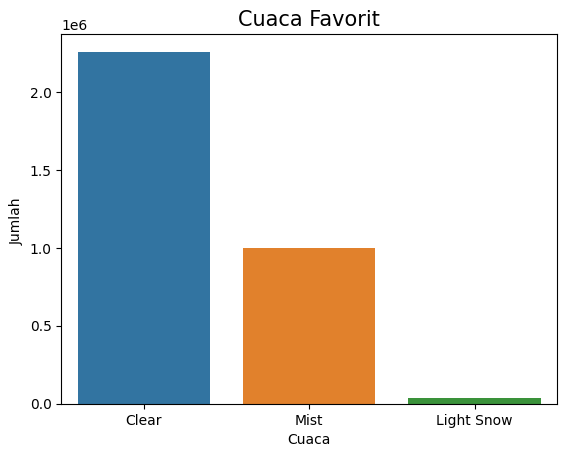

In [ ]:
sns.barplot(x="weathersit", y="cnt", data=weather_count)

plt.title("Cuaca Favorit", loc="center", fontsize=15)
plt.ylabel('Jumlah ')
plt.xlabel('Cuaca')
plt.show()

Dari data diatas bisa dilihat cuaca favorit pengguna adalah "Clear"

In [ ]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


## Pertanyaan 2
Bagaimana tren peminjaman sepeda berubah seiring berjalannya waktu? Apakah ada peningkatan atau penurunan dari tahun ke tahun, bulan ke bulan, atau musim ke musim?

In [ ]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  df[column] = pd.to_datetime(df[column])

In [ ]:
monthly_users_df = df.resample(rule='M', on='dteday').agg({
    "casual": "sum",
    'registered': 'sum'
})
monthly_users_df.index = monthly_users_df.index.strftime('%Y-%m')
monthly_users_df = monthly_users_df.reset_index()
monthly_users_df.rename(columns={
    "dteday": "Month"
}, inplace=True)
monthly_users_df

,Month,casual,registered
0,2011-01,3073,35116
1,2011-02,6242,41973
2,2011-03,12826,51219
3,2011-04,22346,72524
4,2011-05,31050,104771
5,2011-06,30612,112900
6,2011-07,36452,104889
7,2011-08,28842,107849
8,2011-09,26545,100873
9,2011-10,25222,98289


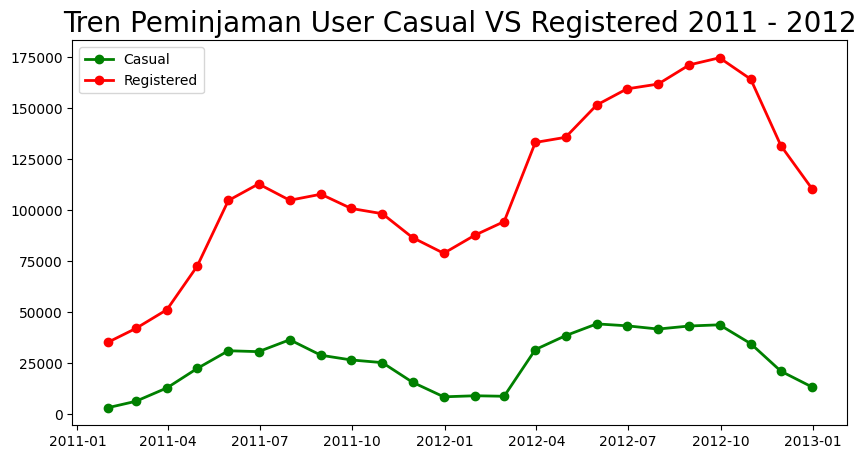

In [ ]:
monthly_users_df = df.resample(rule='M', on='dteday').agg({
    "casual": "sum",
    'registered': 'sum'
})

monthly_users_df = monthly_users_df.reset_index()
monthly_users_df.rename(columns={
    "dteday": "Month"
}, inplace=True)
plt.figure(figsize=(10, 5))
plt.plot(monthly_users_df["Month"], monthly_users_df["casual"], marker='o', linewidth=2, color="green")
plt.plot(monthly_users_df["Month"], monthly_users_df["registered"], marker='o', linewidth=2, color="red")
plt.title("Tren Peminjaman User Casual VS Registered 2011 - 2012", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.legend(["Casual", "Registered"], loc="upper left", fontsize=10)
plt.show()



Dari visualisasi diatas bisa terlihat bahwa trend naik ketika bulan januari sampai bulan juni dan tren turun pada bulan juni sampai oktober

## Pertanyaan 3

Bagaimana penggunaan antara user terdaftar dengan user biasa?

In [ ]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [ ]:
df_season_casual = df.groupby(by='season').casual.sum().reset_index()
df_season_registered = df.groupby(by='season').registered.sum()

In [ ]:
df_season_casReg = pd.merge(df_season_casual, df_season_registered, on='season', suffixes=('_casual', '_registered'))
# Membuat dictionary untuk pemetaan nama musim
mapping_season = {1: 'springer', 2: 'summer', 3: 'fall', 4: 'winter'}

# Menggunakan metode map untuk merename nilai dalam kolom 'season'
df_season_casReg['season'] = df_season_casReg['season'].map(mapping_season)

df_season_casReg = 0

In [ ]:
df_new = df[['season', 'casual', 'registered']]
mapping_season = {1: 'springer', 2: 'summer', 3: 'fall', 4: 'winter'}

# Menggunakan metode map untuk merename nilai dalam kolom 'season'
df_new['season'] = df_new['season'].map(mapping_season)
df_new

<ipython-input-65-5dbaa492c1d7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['season'] = df_new['season'].map(mapping_season)


,season,casual,registered
0,springer,331,654
1,springer,131,670
2,springer,120,1229
3,springer,108,1454
4,springer,82,1518
...,...,...,...
726,springer,247,1867
727,springer,644,2451
728,springer,159,1182
729,springer,364,1432


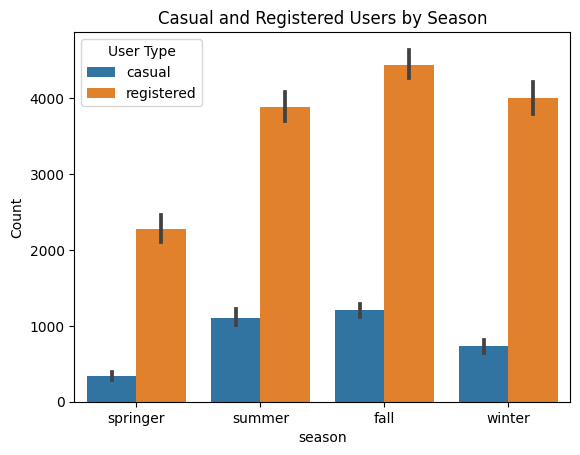

In [ ]:


# Melt DataFrame untuk memperbaiki struktur data agar sesuai dengan Seaborn
df_melted = df_new.melt(id_vars='season', value_vars=['casual', 'registered'], var_name='user_type', value_name='count')

# Buat bar plot menggunakan Seaborn
sns.barplot(x='season', y='count', hue='user_type', data=df_melted)

# Tampilkan plot
plt.xlabel('season')
plt.ylabel('Count')
plt.title('Casual and Registered Users by Season')
plt.legend(title='User Type')
plt.show()

Dari visualisasi gambar diatas pengguna yang terdaftar lebih banyak daripada pengguna biasa

# Kesimpulan

Penggunaan sepeda selama data 2 tahun ternyata didominasi oleh pengguna yang telah terdaftar (Registered), kemudian jumlah pengguna tersebut bisa didapatkan bahwa musim favorit yaitu musim gugur (fall) dikarenakan musim tersebut menjadi favorit maka bisa disimpulkan bahwa terjadi tren kenaikan dan penurunan secara berulang yaitu ketika tren naik terjadi pada musim gugur (fall)